# Heart Disease Prediction Using Decision tree and Random Forest

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
heartData = pd.read_csv("C:\\Users\\soumy\\Downloads\\Soumya Rawat - heart_v2.csv")

In [26]:
heartData.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [27]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [28]:
heartData.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [29]:
print(heartData.columns)

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')


### Total missing percent of data

In [30]:
print("\nMissing values in each column:")
print(heartData.isnull().sum())


Missing values in each column:
age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64


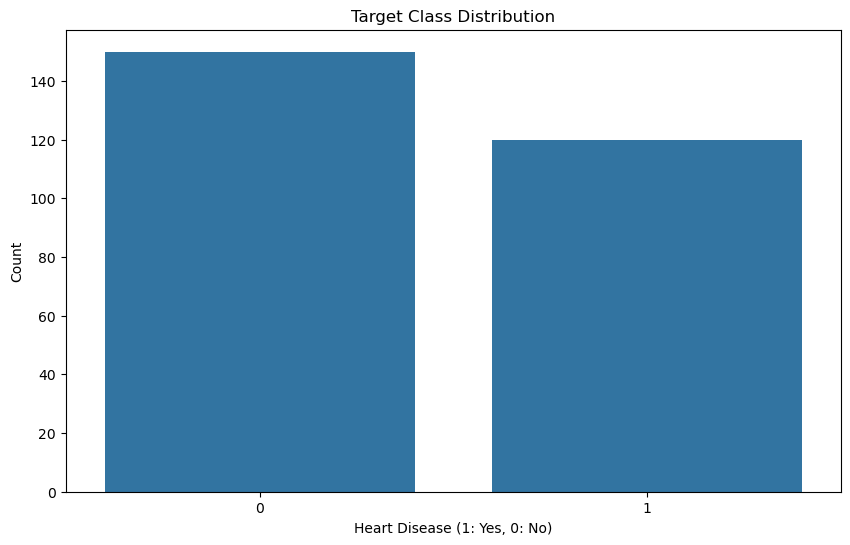

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=heartData, x='heart disease')
plt.title('Target Class Distribution')
plt.xlabel('Heart Disease (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

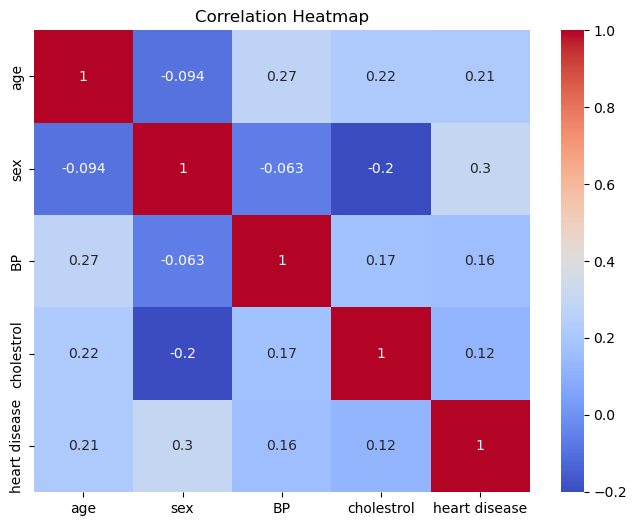

In [32]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heartData.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
X = heartData.drop('heart disease', axis=1)
y = heartData['heart disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (216, 4), Testing Data: (54, 4)


### Decision Tree Model


In [34]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        33
           1       0.48      0.62      0.54        21

    accuracy                           0.59        54
   macro avg       0.59      0.60      0.59        54
weighted avg       0.62      0.59      0.60        54



###  Train the Random Forest Classifier

In [35]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.50      0.57      0.53        21

    accuracy                           0.61        54
   macro avg       0.60      0.60      0.60        54
weighted avg       0.62      0.61      0.61        54



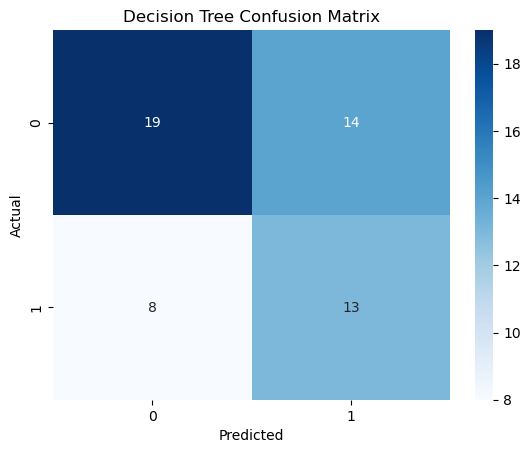

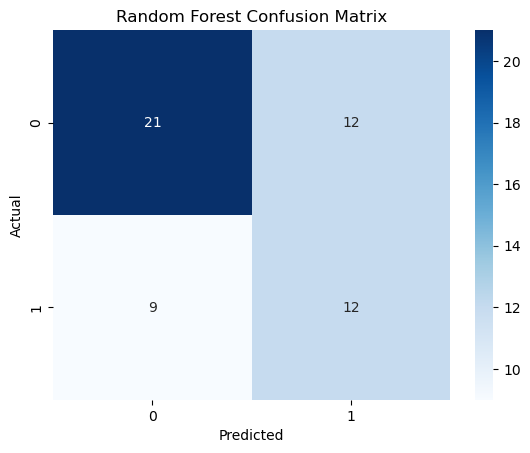

In [36]:
def plot_confusion(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion(cm_dt, "Decision Tree Confusion Matrix")
plot_confusion(cm_rf, "Random Forest Confusion Matrix")